In [4]:
#pandas libraries
import seaborn as sns
# custom libraries
from cargar_df import get_train

df = get_train()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int16         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int16         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int16         
 5   Bureaucratic_Code_0_Approval        16947 non-null  category      
 6   Bureaucratic_Code_0_Approved        16947 non-null  category      
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              16947 non-null  object        
 10  Billing_Country       

In [14]:
df["Stage"].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [19]:
finished = df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")]

In [23]:
finished["Won"] = finished["Stage"] == "Closed Won"

0        False
1         True
2         True
3        False
4        False
         ...  
16942     True
16943     True
16944     True
16945    False
16946    False
Name: Stage, Length: 16883, dtype: bool

In [24]:
finished["Won"]

0        False
1         True
2         True
3        False
4        False
         ...  
16942     True
16943     True
16944     True
16945    False
16946    False
Name: Won, Length: 16883, dtype: bool

In [25]:
finished.corr()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount,Won
ID,1.000000,0.173203,0.048820,-0.110466,0.283175,0.040776,-0.326168,-0.037111,0.012258,0.032703,0.038966
"Pricing, Delivery_Terms_Quote_Appr",0.173203,1.000000,0.578051,-0.016172,0.126504,-0.002865,-0.042821,0.076864,0.036466,0.055933,-0.084992
"Pricing, Delivery_Terms_Approved",0.048820,0.578051,1.000000,0.035136,0.063813,-0.004638,0.067506,-0.041604,-0.020068,-0.002655,0.204484
Opportunity_ID,-0.110466,-0.016172,0.035136,1.000000,-0.094714,-0.033233,0.516984,0.003576,-0.003670,-0.002257,0.013347
ASP,0.283175,0.126504,0.063813,-0.094714,1.000000,0.090996,-0.174914,-0.070796,0.144060,0.108095,0.089578
ASP_(converted),0.040776,-0.002865,-0.004638,-0.033233,0.090996,1.000000,-0.081415,-0.000849,0.094064,0.486399,-0.015702
Delivery_Year,-0.326168,-0.042821,0.067506,0.516984,-0.174914,-0.081415,1.000000,0.047639,0.009188,0.015355,0.004799
TRF,-0.037111,0.076864,-0.041604,0.003576,-0.070796,-0.000849,0.047639,1.000000,0.410638,0.333258,-0.188661
Total_Amount,0.012258,0.036466,-0.020068,-0.003670,0.144060,0.094064,0.009188,0.410638,1.000000,0.716500,-0.083185
Total_Taxable_Amount,0.032703,0.055933,-0.002655,-0.002257,0.108095,0.486399,0.015355,0.333258,0.716500,1.000000,-0.080349


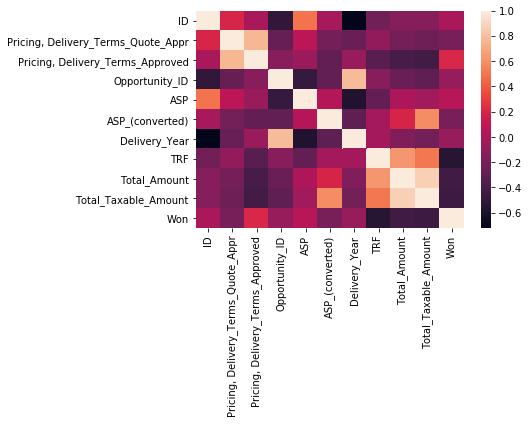

In [26]:
corr = finished.corr().corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)